# Details

- Name / Data Type / Measurement Unit / Description
-----------------------------
- Sex / nominal / -- / M, F, and I (infant)
- Length / continuous / mm / Longest shell measurement
- Diameter / continuous / mm / perpendicular to length
- Height / continuous / mm / with meat in shell
- Whole weight / continuous / grams / whole abalone
- Shucked weight / continuous / grams / weight of meat
- Viscera weight / continuous / grams / gut weight (after bleeding)
- Shell weight / continuous / grams / after being dried
- Rings / integer / -- / +1.5 gives the age in years. 

# Abstract 

- predict the ring size to predict the age.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split


import warnings
warnings.filterwarnings("ignore")

In [2]:
abalone = pd.read_csv("Abalone.csv")

In [3]:
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
ab = abalone

In [5]:
abalone.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [6]:
abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [7]:
abalone.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [8]:
abalone.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

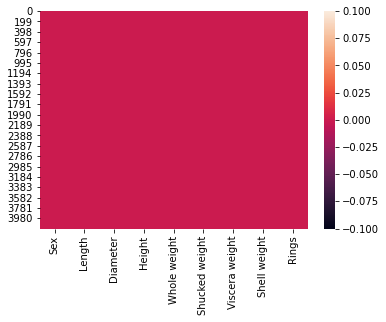

In [9]:
sns.heatmap(abalone.isnull())

In [10]:
abalone.shape

(4177, 9)

In [11]:
abalone["Sex"].unique()

array(['M', 'F', 'I'], dtype=object)

In [12]:
data = abalone["Rings"].sort_values(ascending = True)
data.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29], dtype=int64)

M    1528
I    1342
F    1307
Name: Sex, dtype: int64


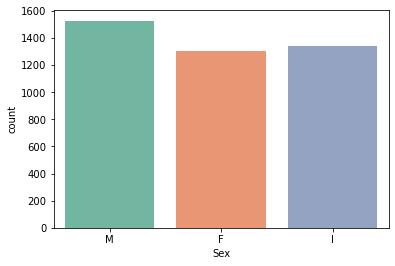

In [13]:
ax = sns.countplot(data = abalone, x = "Sex", palette = "Set2")
print(abalone["Sex"].value_counts())

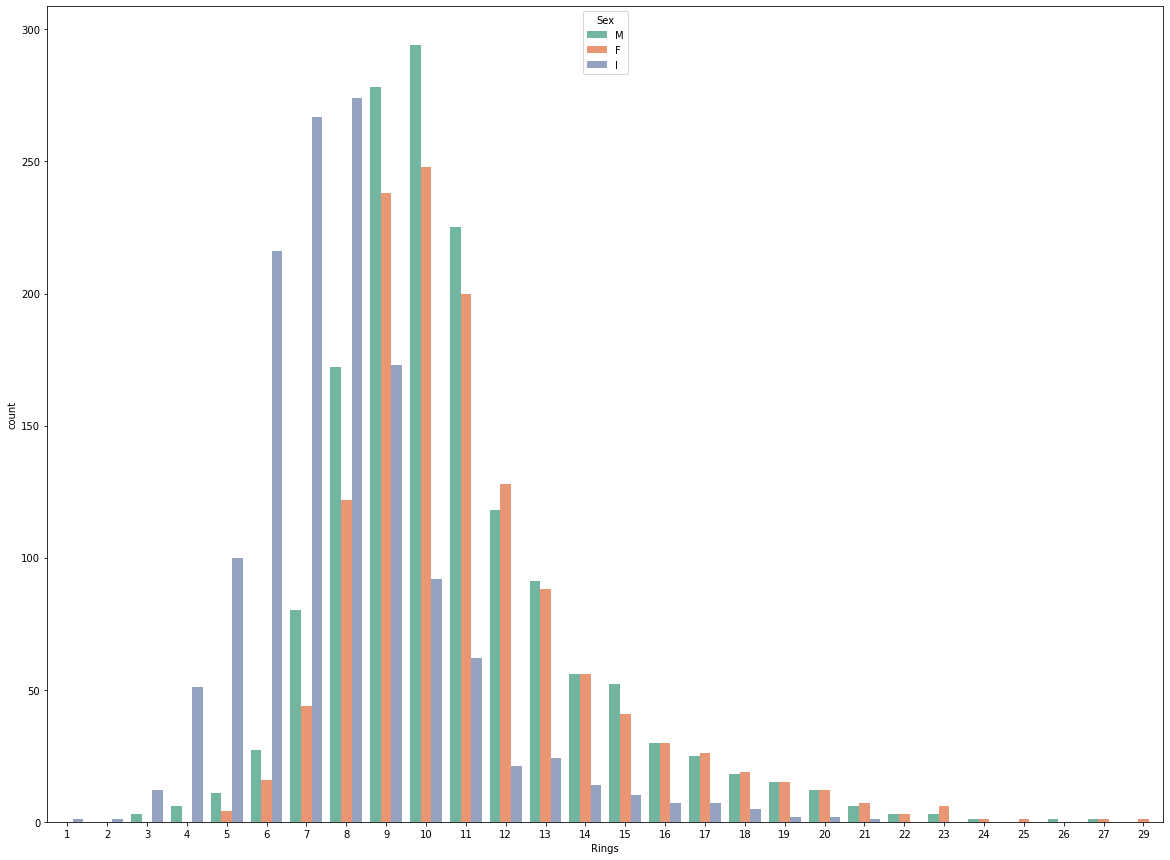

In [14]:
fig_size = (20,15)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data = abalone, x = "Rings", palette = "Set2", hue="Sex")


In [15]:
print(abalone["Rings"].value_counts())

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
24      2
27      2
1       1
25      1
2       1
26      1
29      1
Name: Rings, dtype: int64


In [16]:
abalone.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

Text(0.5, 1.0, 'Scatter plot comparison Length and Rings')

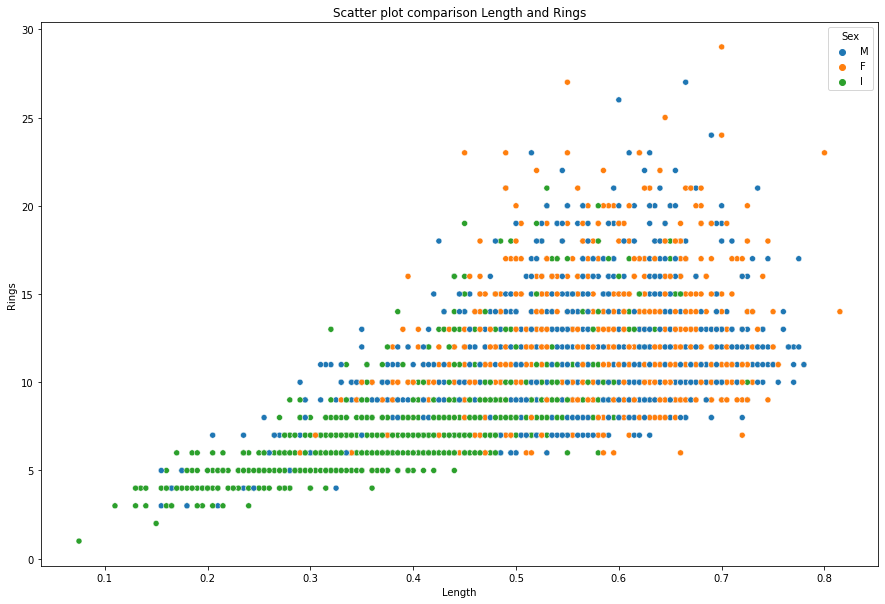

In [17]:
fig_size = (15,10)
fig, ax = plt.subplots(figsize = fig_size)
sns.scatterplot(x='Length', y= 'Rings', hue="Sex", data=abalone, sizes = 15)
plt.title("Scatter plot comparison Length and Rings")

Text(0.5, 1.0, 'Scatter plot comparison Diameter and Rings')

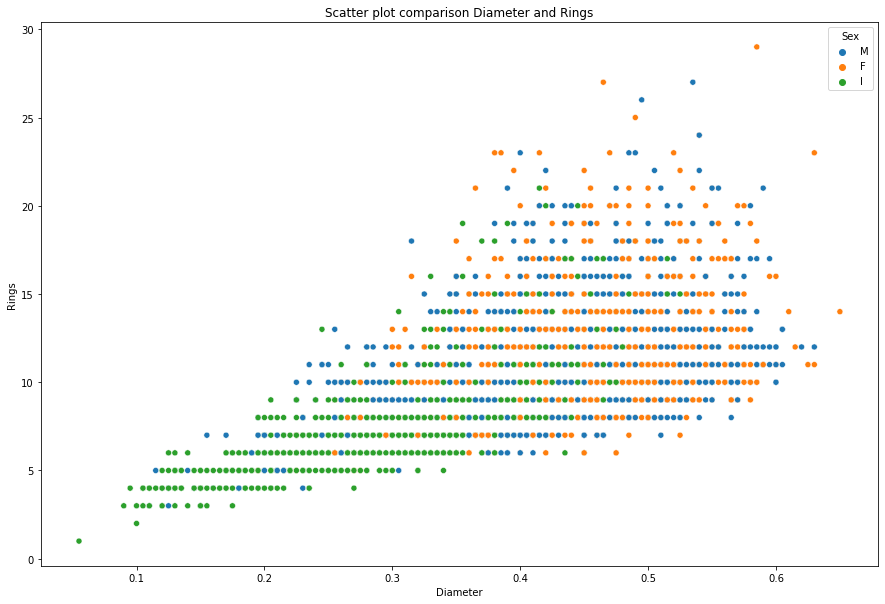

In [18]:
fig_size = (15,10)
fig, ax = plt.subplots(figsize = fig_size)
sns.scatterplot(x='Diameter', y= 'Rings', hue="Sex", data=abalone, sizes = 15)
plt.title("Scatter plot comparison Diameter and Rings")

Text(0.5, 1.0, 'Scatter plot comparison Height and Rings')

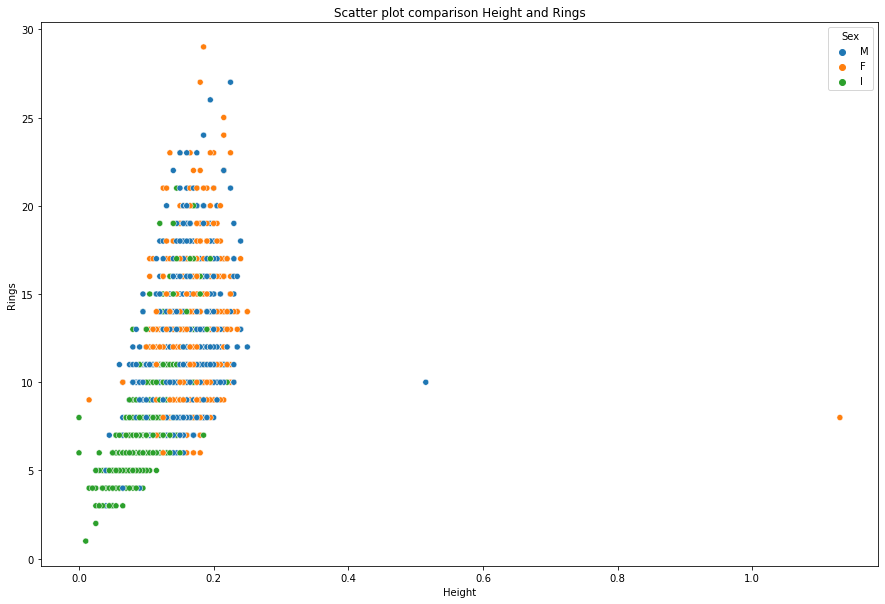

In [19]:
fig_size = (15,10)
fig, ax = plt.subplots(figsize = fig_size)
sns.scatterplot(x='Height', y= 'Rings', hue="Sex", data=abalone, sizes = 15)
plt.title("Scatter plot comparison Height and Rings")

Text(0.5, 1.0, 'Scatter plot comparison Whole weight and Rings')

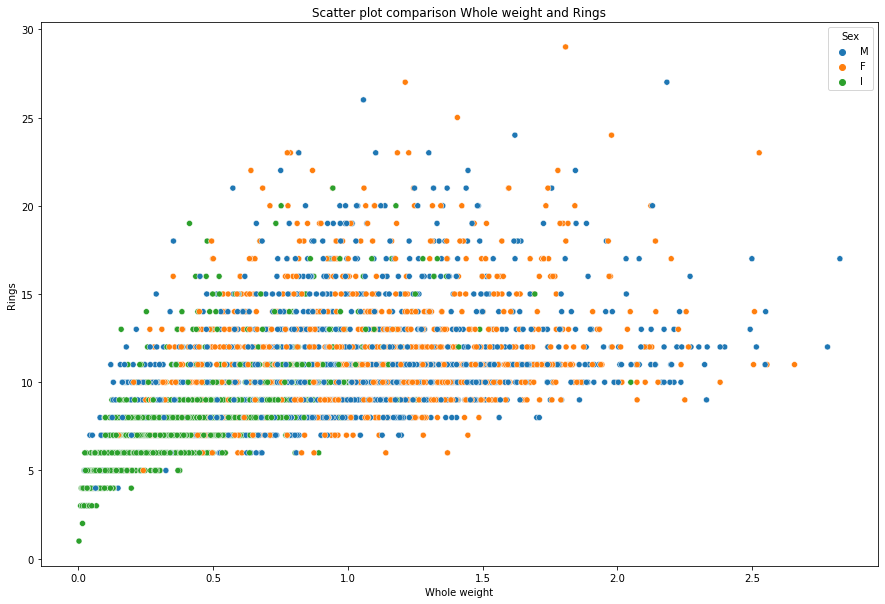

In [20]:
fig_size = (15,10)
fig, ax = plt.subplots(figsize = fig_size)
sns.scatterplot(x='Whole weight', y= 'Rings', hue="Sex", data=abalone, sizes = 15)
plt.title("Scatter plot comparison Whole weight and Rings")

Text(0.5, 1.0, 'Scatter plot comparison Shucked weight and Rings')

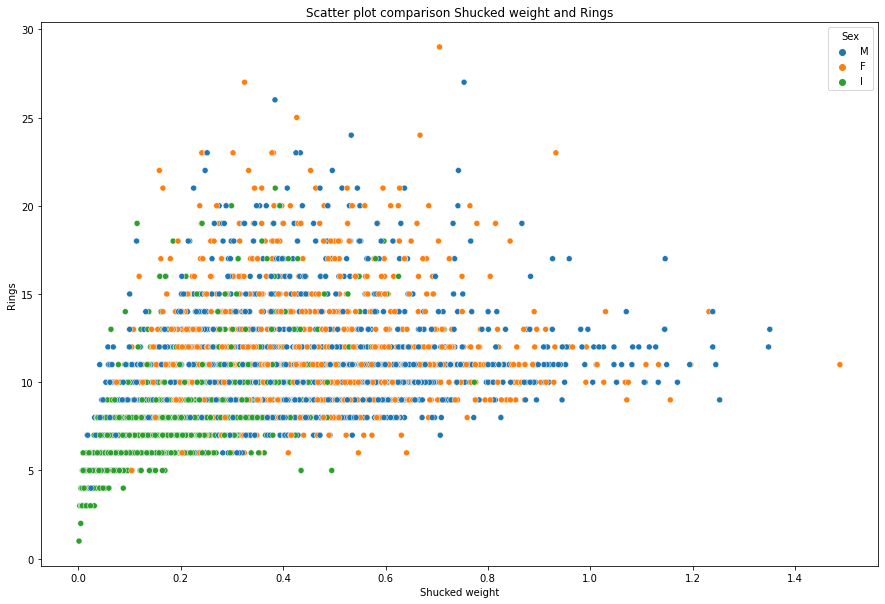

In [21]:
fig_size = (15,10)
fig, ax = plt.subplots(figsize = fig_size)
sns.scatterplot(x='Shucked weight', y= 'Rings', hue="Sex", data=abalone, sizes = 15)
plt.title("Scatter plot comparison Shucked weight and Rings")

Text(0.5, 1.0, 'Scatter plot comparison Viscera weight and Rings')

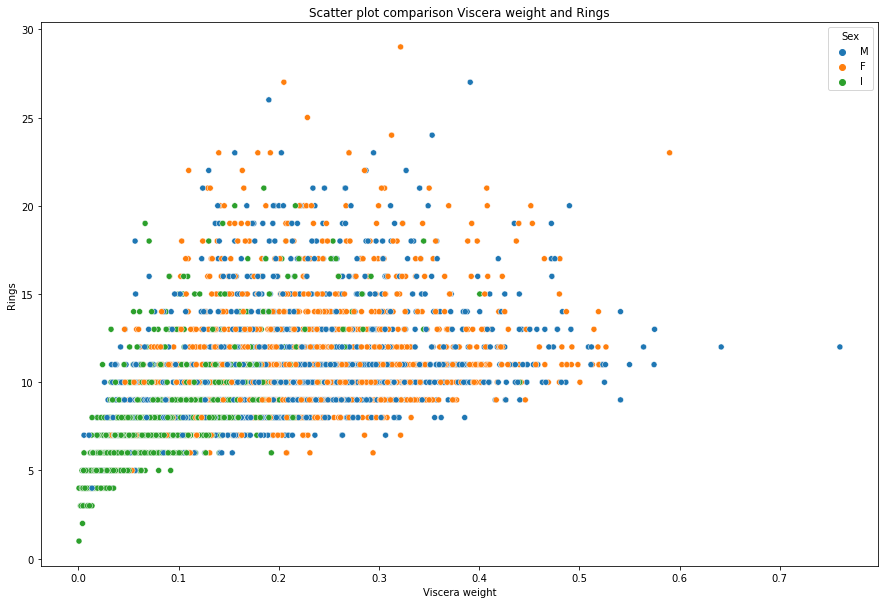

In [22]:
fig_size = (15,10)
fig, ax = plt.subplots(figsize = fig_size)
sns.scatterplot(x='Viscera weight', y= 'Rings', hue="Sex", data=abalone, sizes = 15)
plt.title("Scatter plot comparison Viscera weight and Rings")

Text(0.5, 1.0, 'Scatter plot comparison Shell weight  and Rings')

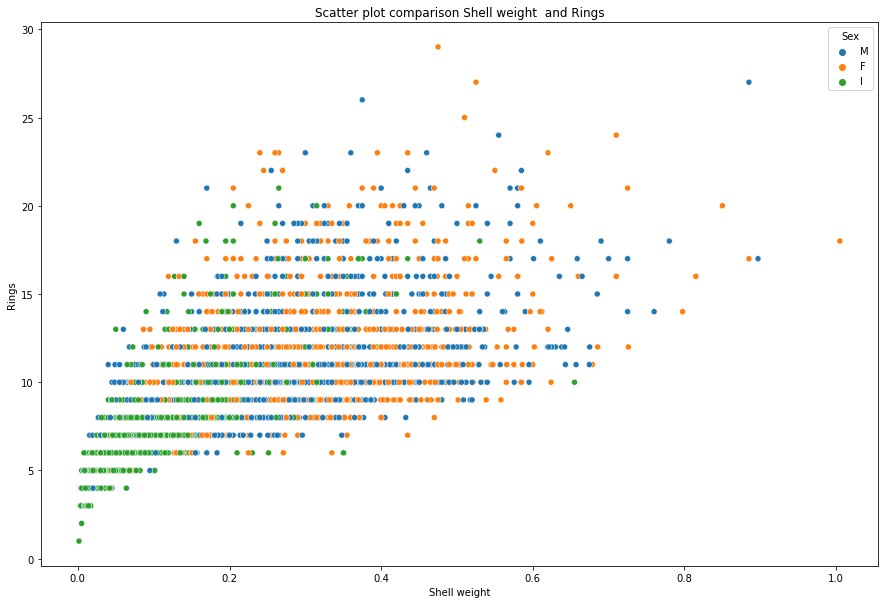

In [23]:
fig_size = (15,10)
fig, ax = plt.subplots(figsize = fig_size)
sns.scatterplot(x='Shell weight', y= 'Rings', hue="Sex", data=abalone, sizes = 15)
plt.title("Scatter plot comparison Shell weight  and Rings")

Text(0.5, 1.0, 'Scatter plot comparison Length and Rings')

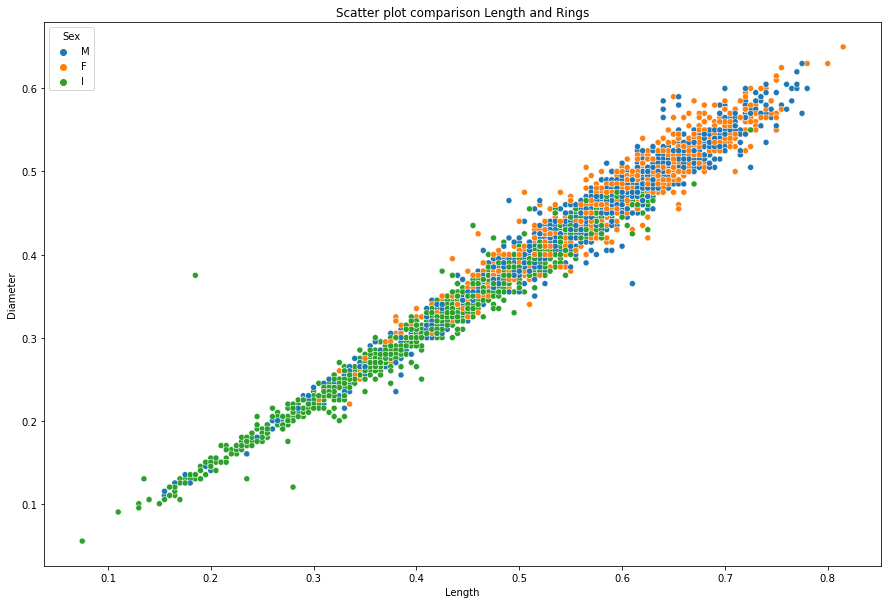

In [24]:
fig_size = (15,10)
fig, ax = plt.subplots(figsize = fig_size)
sns.scatterplot(x='Length', y='Diameter', hue="Sex", data=abalone, sizes = 15)
plt.title("Scatter plot comparison Length and Rings")

In [25]:
#sns.pairplot(abalone, hue="Sex", kind='scatter')

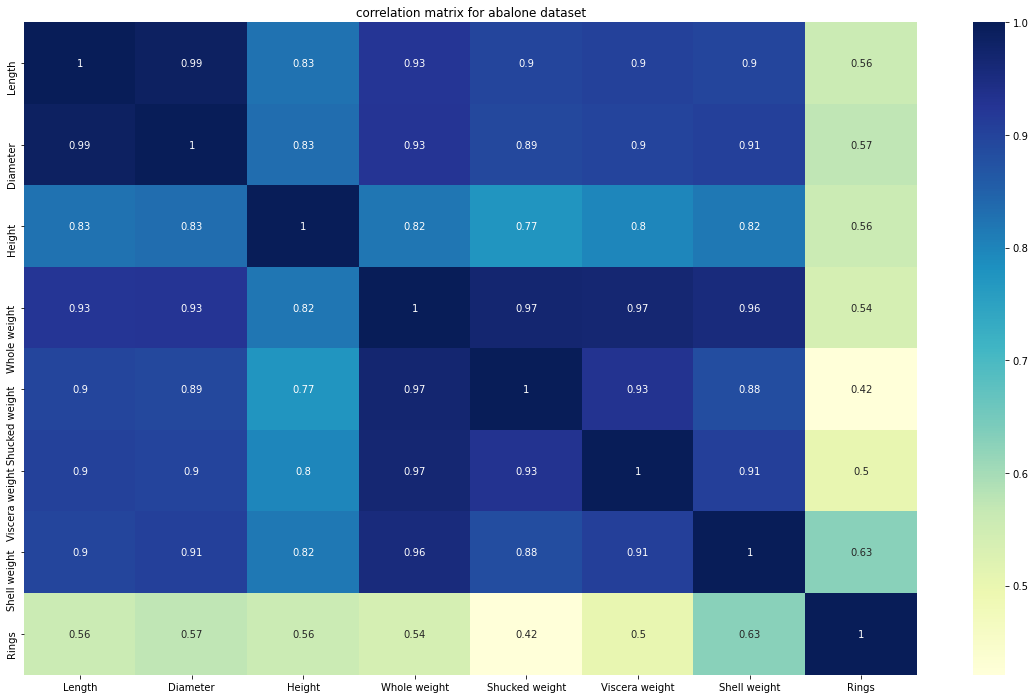

In [26]:
corr_mat = abalone.corr()
plt.figure(figsize=[20,12])
sns.heatmap(corr_mat, annot=True, cmap="YlGnBu")
plt.title("correlation matrix for abalone dataset")
plt.show()

In [27]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()

new = ohe.fit_transform(abalone["Sex"].values.reshape(-1,1)).toarray()

In [28]:
new_df = pd.DataFrame(new, columns = [np.unique(ab["Sex"])])
abalone = pd.concat([abalone, new_df], axis = 1)

In [29]:
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,"(F,)","(I,)","(M,)"
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0.0,0.0,1.0
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0.0,0.0,1.0
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1.0,0.0,0.0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0.0,0.0,1.0
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0.0,1.0,0.0


In [30]:
abalone = abalone.drop(["Sex"], axis =1)

In [31]:
abalone.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,"(F,)","(I,)","(M,)"
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0.0,0.0,1.0
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0.0,0.0,1.0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1.0,0.0,0.0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0.0,0.0,1.0
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0.0,1.0,0.0


In [32]:
abalone.shape

(4177, 11)

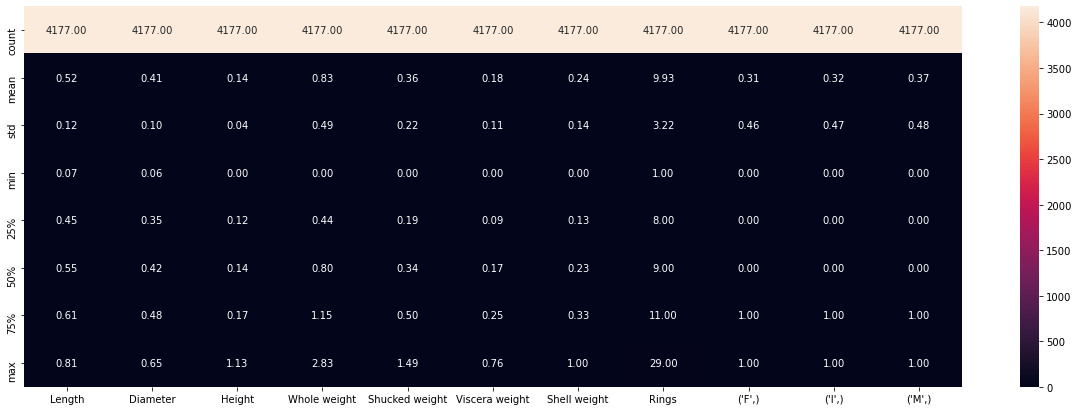

In [33]:
plt.figure(figsize =(21, 7))
sns.heatmap(abalone.describe(), annot=True, linecolor = "black", fmt="0.2f")

In [34]:
abalone.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,"(F,)","(I,)","(M,)"
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684,0.312904,0.321283,0.365813
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169,0.463731,0.467025,0.481715
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,0.000000,0.000000,0.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000,0.000000,0.000000,0.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000,0.000000,0.000000,0.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000,1.000000,1.000000,1.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,1.000000,1.000000,1.000000


In [35]:
abalone.columns

Index([        'Length',       'Diameter',         'Height',   'Whole weight',
       'Shucked weight', 'Viscera weight',   'Shell weight',          'Rings',
                 ('F',),           ('I',),           ('M',)],
      dtype='object')

In [36]:
abalone.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,"(F,)","(I,)","(M,)"
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720,0.309666,-0.551465,0.236543
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660,0.318626,-0.564315,0.240376
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467,0.298421,-0.518552,0.215459
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390,0.299741,-0.557592,0.252038
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884,0.263991,-0.521842,0.251793
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819,0.308444,-0.556081,0.242194
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574,0.306319,-0.546953,0.235391
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000,0.250279,-0.436063,0.181831
"(F,)",0.309666,0.318626,0.298421,0.299741,0.263991,0.308444,0.306319,0.250279,1.000000,-0.464298,-0.512528
"(I,)",-0.551465,-0.564315,-0.518552,-0.557592,-0.521842,-0.556081,-0.546953,-0.436063,-0.464298,1.000000,-0.522541


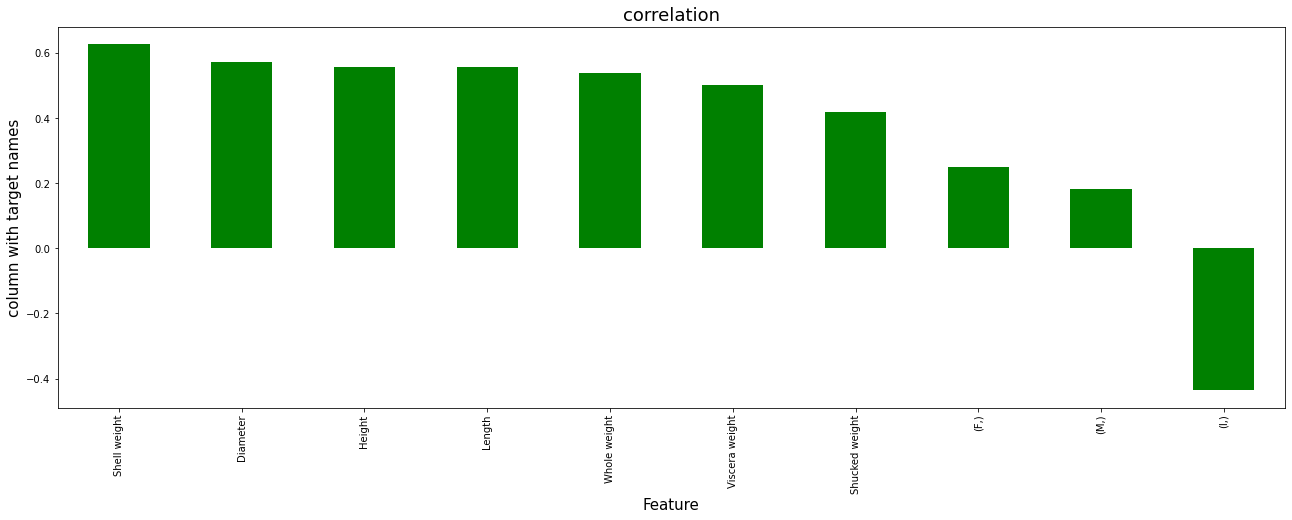

In [37]:
plt.figure(figsize=(22,7))
abalone.corr()["Rings"].sort_values(ascending = False).drop(["Rings"]).plot(kind = "bar", color = "g")
plt.xlabel("Feature", fontsize = 15)
plt.ylabel("column with target names", fontsize = 15)
plt.title("correlation", fontsize=18)
plt.show()

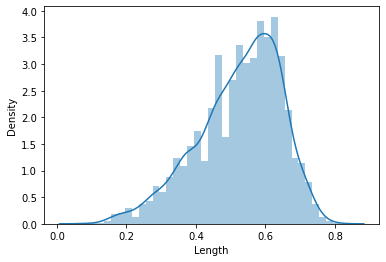

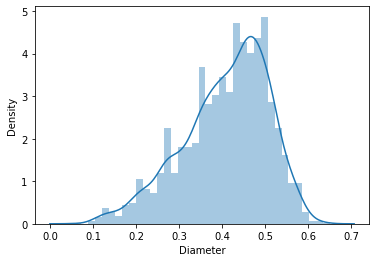

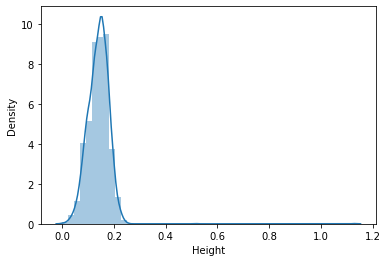

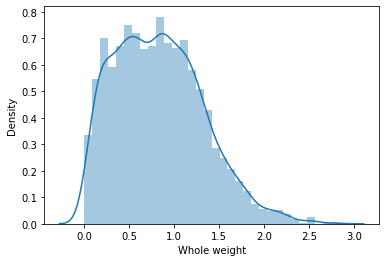

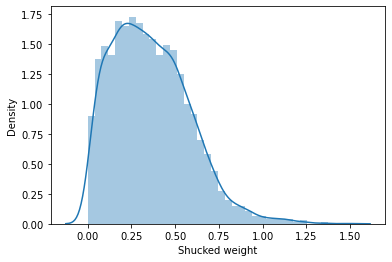

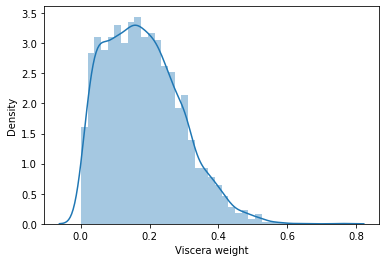

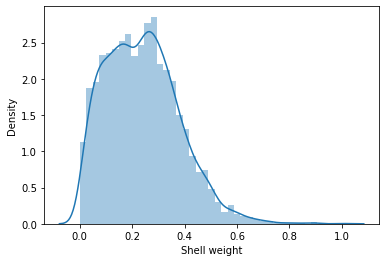

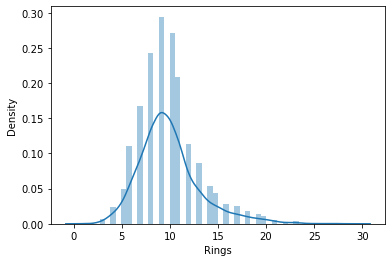

In [38]:
columns = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings']
for value in columns:
    sns.distplot(abalone[value],kde=True)
    plt.show()

In [39]:
abalone.skew()

Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
(F,)              0.807302
(I,)              0.765708
(M,)              0.557390
dtype: float64

In [40]:
x = abalone.drop("Rings", axis=1)
y = abalone["Rings"]

In [41]:
x.shape

(4177, 10)

In [42]:
y.shape

(4177,)

In [43]:
x.skew()

Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
(F,)              0.807302
(I,)              0.765708
(M,)              0.557390
dtype: float64

In [44]:
from sklearn.preprocessing import power_transform

abalone_new = power_transform(x)

abalone_new = pd.DataFrame(abalone_new, columns = x.columns)

In [45]:
abalone_new.skew()

Length           -0.066669
Diameter         -0.065977
Height           -0.115483
Whole weight     -0.003980
Shucked weight    0.027351
Viscera weight    0.039780
Shell weight      0.023390
(F,)              0.807302
(I,)              0.765708
(M,)              0.557390
dtype: float64

In [46]:
x = abalone_new

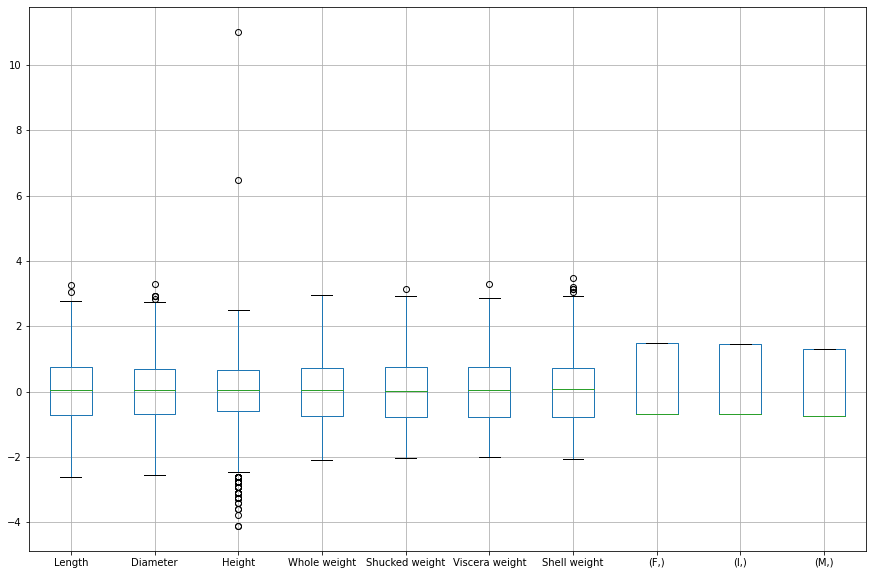

In [47]:
x.boxplot(figsize = [15,10])
plt.show()

In [48]:
# z-score to find the outlier
from scipy import stats
import numpy as np

z= np.abs(stats.zscore(x))
print(z)

[[0.68550213 0.54986033 1.12451192 ... 0.67483383 0.68801788 1.31667716]
 [1.39634403 1.38733299 1.26439579 ... 0.67483383 0.68801788 1.31667716]
 [0.07077438 0.00853714 0.06482301 ... 1.48184628 0.68801788 0.75948762]
 ...
 [0.59336612 0.64519089 1.56508168 ... 0.67483383 0.68801788 1.31667716]
 [0.85337516 0.76992788 0.30708344 ... 1.48184628 0.68801788 0.75948762]
 [1.83447784 1.72628889 1.34794324 ... 0.67483383 0.68801788 1.31667716]]


In [49]:
#define a thershold to identify the outlier
thershold = 3
print(np.where(z>3))

(array([ 163,  166,  236,  237,  238,  306,  694,  719,  720,  891, 1174,
       1209, 1257, 1417, 1428, 1428, 1763, 1987, 2051, 2108, 2161, 2169,
       2171, 2172, 2334, 2381, 2711, 3190, 3902, 3996], dtype=int64), array([6, 6, 2, 2, 2, 2, 2, 2, 2, 6, 2, 4, 2, 2, 0, 1, 5, 2, 2, 6, 6, 2,
       2, 2, 0, 2, 2, 2, 2, 2], dtype=int64))


In [50]:
x =  x[(z<3).all(axis=1)]

In [51]:
x.shape

(4148, 10)

In [52]:
data_loss = ((4177-4148)/4177)*100

In [53]:
data_loss

0.6942781900885803

In [54]:
y =y[(z<3).all(axis=1)]

In [55]:
print(x.shape, y.shape)

(4148, 10) (4148,)


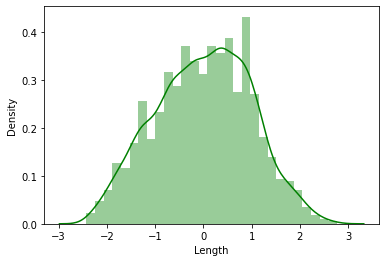

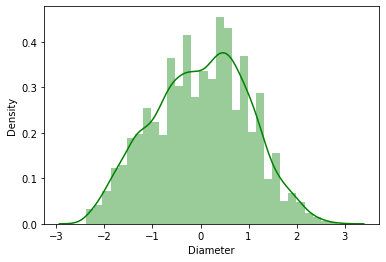

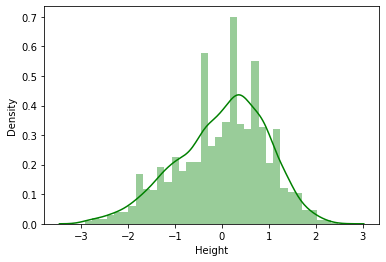

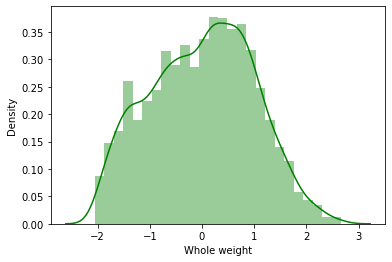

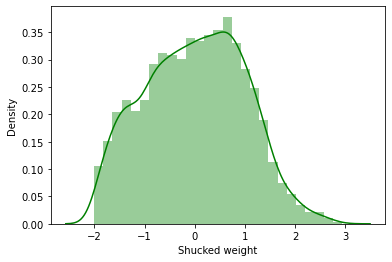

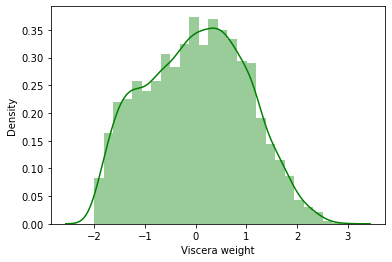

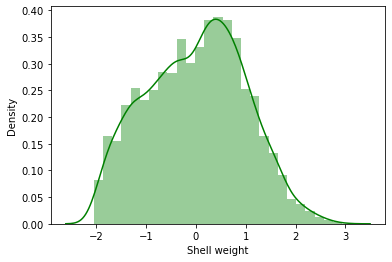

In [56]:
column = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight']
for value in column:
    sns.distplot(x[value],kde=True, color = 'g')
    plt.show()

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
lr = LinearRegression()
max_accu = 0
max_rs = 0
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = i, test_size = .20)
    lr.fit(x_train, y_train)
    predrs = lr.predict(x_test)
    acc = r2_score(y_test, predrs)
    if  acc>max_accu:
        max_accu = acc
        max_rs = i
print("Best Accuracy is : ", max_accu, "on Random State ", max_rs)

Best Accuracy is :  0.6022471807126807 on Random State  81


In [58]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .20, random_state = 81)

In [59]:
print(x_test.shape)
print(y_test.shape)
print(x_train.shape)
print(y_train.shape)

(830, 10)
(830,)
(3318, 10)
(3318,)


In [60]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
lr = LinearRegression()
lr.fit(x_train, y_train)
predlr = lr.predict(x_test)
print(r2_score(y_test, predlr))
print("Mean absolute error: ", mean_absolute_error(y_test,predlr))
print("Mean squared error: ", mean_squared_error(y_test,predlr))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, predlr)))



0.6022471807126807
Mean absolute error:  1.4714118464315276
Mean squared error:  3.9862003475338055
Root Mean Squared Error:  1.9965471062646645


In [61]:
#DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor()
DTR.fit(x_train,y_train)
preddtr = DTR.predict(x_test)
print(r2_score(y_test,preddtr))
print('error')
print("Mean absolute error: ", mean_absolute_error(y_test,preddtr))
print("Mean squared error: ", mean_squared_error(y_test,preddtr))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, preddtr)))

0.13129162430004548
error
Mean absolute error:  2.07710843373494
Mean squared error:  8.706024096385542
Root Mean Squared Error:  2.950597244014429


In [62]:
#RandomforestRegressor
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(n_estimators=100)
RFR.fit(x_train,y_train)
predrfr = RFR.predict(x_test)
print(r2_score(y_test,predrfr))

print('error')
print("Mean absolute error: ", mean_absolute_error(y_test,predrfr))
print("Mean squared error: ", mean_squared_error(y_test,predrfr))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, predrfr)))

0.5724535596652385
error
Mean absolute error:  1.492012048192771
Mean squared error:  4.284786144578313
Root Mean Squared Error:  2.069972498507725


In [63]:
#RandomforestRegressor
from sklearn.ensemble import AdaBoostRegressor
abr = RandomForestRegressor(n_estimators=100)
abr.fit(x_train,y_train)
predabr = abr.predict(x_test)
print(r2_score(y_test,predrfr))

print('error')
print("Mean absolute error: ", mean_absolute_error(y_test,predabr))
print("Mean squared error: ", mean_squared_error(y_test,predabr))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, predabr)))

0.5724535596652385
error
Mean absolute error:  1.4846867469879517
Mean squared error:  4.246565903614457
Root Mean Squared Error:  2.060719753778873


In [64]:
from sklearn.neighbors import KNeighborsRegressor
knnr = KNeighborsRegressor(n_neighbors = 14)
knnr.fit(x_train, y_train)
predknnr = knnr.predict(x_test)
#check the accuracy score
print(r2_score(y_test,predknnr))

print('error')
print("Mean absolute error: ", mean_absolute_error(y_test,predknnr))
print("Mean squared error: ", mean_squared_error(y_test,predknnr))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, predknnr)))

0.5644491343079681
error
Mean absolute error:  1.4823580034423405
Mean squared error:  4.365004917629703
Root Mean Squared Error:  2.0892594184614084


In [65]:
from sklearn.model_selection import cross_val_score

lr_scr = cross_val_score(lr, x, y, cv = 7)
print("the cross validation score of Linear regression model :", lr_scr.mean())\

diff = round((r2_score(y_test, predlr))*100) - round((lr_scr.mean())*100)
print("The difference is : " , diff )

the cross validation score of Linear regression model : 0.47167737247653324
The difference is :  13.0


In [66]:
from sklearn.model_selection import cross_val_score

dtr_scr = cross_val_score(lr, x, y, cv = 7)
print("the cross validation score of Linear regression model :", dtr_scr.mean())\

diff = round((r2_score(y_test, preddtr))*100) - round((dtr_scr.mean())*100)
print("The difference is : " , diff )

the cross validation score of Linear regression model : 0.47167737247653324
The difference is :  -34.0


In [67]:
from sklearn.model_selection import cross_val_score

rfr_scr = cross_val_score(RFR, x, y, cv = 7)
print("the cross validation score of Random forest REGRESSOR model :", rfr_scr.mean())

diff = round((r2_score(y_test, predrfr))*100) - round((rfr_scr.mean())*100)
print("The difference is : " , diff )

the cross validation score of Random forest REGRESSOR model : 0.4654559120190059
The difference is :  10.0


In [68]:
from sklearn.model_selection import cross_val_score

abr_scr = cross_val_score(abr, x, y, cv = 7)
print("the cross validation score of ada boost REGRESSOR model :", abr_scr.mean())

diff = round((r2_score(y_test, predabr))*100) - round((abr_scr.mean())*100)
print("The difference is : " , diff )

the cross validation score of ada boost REGRESSOR model : 0.46071984279606987
The difference is :  12.0


In [69]:
from sklearn.model_selection import cross_val_score

knnr_scr = cross_val_score(knnr, x, y, cv = 7)
print("the cross validation score of Knearestneighbour REGRESSOR model :", knnr_scr.mean())

diff = round((r2_score(y_test, predknnr))*100) - round((knnr_scr.mean())*100)
print("The difference is : " , diff )

the cross validation score of Knearestneighbour REGRESSOR model : 0.454028617098255
The difference is :  11.0


In [70]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score, KFold

In [71]:
parameters = {'n_estimators': [50, 100],
              'learning_rate' : [0.01,0.05,0.1,0.3,1],
              'loss' : ['linear', 'square', 'exponential']
    
}

In [72]:
RCV = RandomizedSearchCV(AdaBoostRegressor(), parameters, cv=3)
RCV.fit(x_train, y_train)

RandomizedSearchCV(cv=3, estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.3,
                                                          1],
                                        'loss': ['linear', 'square',
                                                 'exponential'],
                                        'n_estimators': [50, 100]})

In [73]:
RCV.best_params_

{'n_estimators': 50, 'loss': 'linear', 'learning_rate': 0.05}

In [74]:
RCV_pred = RCV.best_estimator_.predict(x_test)

In [75]:
r2_score(y_test, RCV_pred)

0.4622152985221679

In [76]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth': np.arange(2,15),
              "criterion": ["mse", "mae"]
    
}
GCV = GridSearchCV(DecisionTreeRegressor(), parameters, cv=5)
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [77]:
GCV.best_params_


{'criterion': 'mse', 'max_depth': 5}

In [78]:
GCV_pred = GCV.best_estimator_.predict(x_test)

In [79]:
r2_score(y_test, GCV_pred)

0.4861437885697133

In [80]:
import joblib
joblib.dump(GCV.best_estimator_, "abaloneDTR.obj")

['abaloneDTR.obj']

In [81]:
import pickle

filename = 'abaloneDTR.obj'
pickle.dump(DTR,open(filename, 'wb'))
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model.predict(x_test)

array([ 9.,  8., 19., 25., 11.,  6., 10.,  6.,  8.,  8., 12.,  8.,  6.,
        9.,  4., 12.,  8.,  8.,  8., 12.,  9., 12.,  7., 10., 10.,  6.,
        9.,  7.,  9., 10., 13., 10., 11.,  5., 13.,  8.,  8., 20.,  8.,
        8., 18.,  8., 11., 14., 21., 14.,  5., 14., 19.,  7.,  8.,  9.,
       10.,  9., 11.,  9., 11., 20.,  8.,  8.,  9., 10., 12., 11.,  9.,
        9., 13.,  5.,  7.,  8.,  8.,  7., 12.,  8., 10., 10.,  9.,  9.,
        9., 15.,  4., 10., 10.,  9.,  9., 10., 10., 12.,  8., 12.,  7.,
        8.,  8.,  9.,  8., 13., 10.,  8., 12., 12., 10., 10., 10., 11.,
        8.,  7., 11., 10.,  7., 15., 10., 11.,  8., 13.,  9.,  8.,  7.,
        8., 15., 11.,  8., 13.,  9.,  9.,  8.,  4.,  9., 13., 11., 10.,
        9., 14., 11.,  9.,  8., 18.,  5.,  9., 13.,  7., 10.,  8., 12.,
       11.,  9., 22., 11., 10., 11.,  7., 12.,  7., 19., 13.,  6., 11.,
        8., 16., 10.,  7.,  9.,  9.,  7., 12., 20., 11., 11.,  9., 10.,
        8.,  8., 19., 12., 15., 12., 13., 12., 11.,  6.,  9., 11

In [82]:
# Conclusion
import numpy as np
a = np.array(y_test)
predicted = np.array(preddtr)
df_con = pd.DataFrame({"orginal":a, "predicted":predicted}, index = range(len(a)))


In [88]:
df_con.tail()

,orginal,predicted
825,5,5.0
826,14,11.0
827,15,13.0
828,9,8.0
829,10,14.0
